In [51]:
import pandas as pd
import numpy as np

dates = pd.date_range(start="2020-01-01", periods=150)
prices = np.concatenate(
    [
        np.linspace(start=110, stop=100, num=50),  # Descend
        np.linspace(start=100, stop=130, num=100),  # Remonte
    ]
)
df = pd.DataFrame(data={"date": dates, "Close": prices})
df["Close Time"] = df["date"]

df.set_index("date", inplace=True)

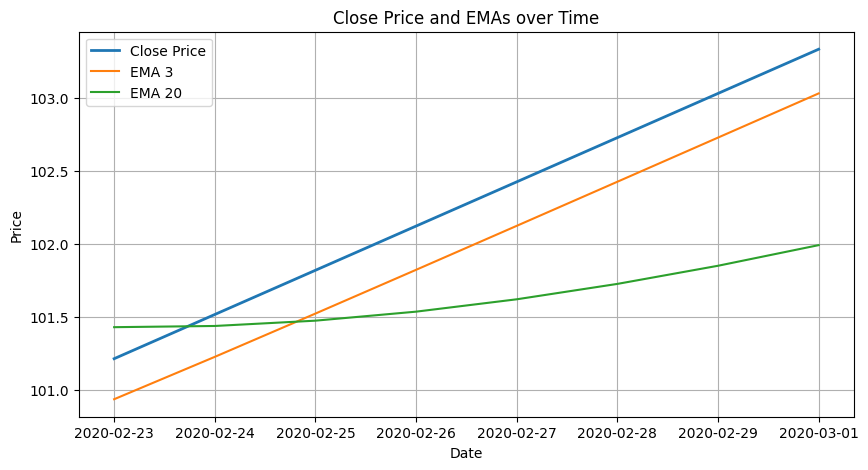

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.mtal.analysis import compute_ema

dates = pd.date_range(start="2020-01-01", periods=150)
prices = np.concatenate(
    [
        np.linspace(start=110, stop=100, num=50),  # Descend
        np.linspace(start=100, stop=130, num=100),  # Remonte
    ]
)
df = pd.DataFrame(data={"date": dates, "Open": prices})
df["Close"] = df["Open"].shift(-1)
df["Open Time"] = df["date"]

df.set_index("date", inplace=True)

compute_ema(df, span=3)
compute_ema(df, span=20)

df_plot = df.iloc[53:61]


# Créer le graphique
plt.figure(figsize=(10, 5))  # Définir la taille du graphique
plt.plot(df_plot.index, df_plot['Close'], label='Close Price', linewidth=2)  
plt.plot(df_plot.index, df_plot['EMA_3'], label='EMA 3')  
plt.plot(df_plot.index, df_plot['EMA_20'], label='EMA 20')  

# Ajouter des titres et des labels
plt.title('Close Price and EMAs over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Montrer le graphique
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
plt.show()


In [17]:
display(df_plot)

,Close,Close Time,EMA_2,EMA_4
date,,,,
2020-02-18,100.204082,2020-02-18,100.204082,100.204082
2020-02-19,100.000000,2020-02-19,100.068027,100.122449
2020-02-20,100.000000,2020-02-20,100.022676,100.073469
2020-02-21,100.303030,2020-02-21,100.209579,100.165294
2020-02-22,100.606061,2020-02-22,100.473900,100.341600
2020-02-23,100.909091,2020-02-23,100.764027,100.568597
